In [1]:
%%html
<style>@font-face{font-family:Vazir;src:url(Vazir.eot);src:url(Vazir.eot?#iefix) format("embedded-opentype"),url(Vazir.woff2) format("woff2"),url(Vazir.woff) format("woff"),url(Vazir.ttf) format("truetype");font-weight:400;font-style:normal}.farsi{font-family:Vazir;direction:rtl}.center{text-align:center}.justify{text-align:justify}.blue{color:blue}<style>

## <div class = "farsi center blue">خواندن از فایل ها</div>

In [2]:
import pandas as pd
import numpy as np

CIFAR_LENGTH = 32
train_data   = pd.read_csv('CIFAR10/CIFAR10_train_data.csv' ,header=None)
train_label  = pd.read_csv('CIFAR10/CIFAR10_train_label.csv',header=None)
test_data    = pd.read_csv('CIFAR10/CIFAR10_val_data.csv'   ,header=None)
test_label   = pd.read_csv('CIFAR10/CIFAR10_val_label.csv'  ,header=None)
real_test    = pd.read_csv('CIFAR10/CIFAR10_test_data.csv'  ,header=None)
print('loading........done')

## <div class = "farsi center blue">توابع اولیه</div>

In [111]:
from PIL import Image
from matplotlib.pyplot import imshow

def vec_to_img(img_vec):
    img_vec = img_vec.astype(np.uint8)
    img_arr = np.asarray(img_vec).reshape((32,32,3))
    return Image.fromarray(img_arr, 'RGB')
def img_to_vec(img):
    arr = np.array(img)
    return arr.ravel()
def print_img(img):
    imshow(np.asarray(img))
def calc_grade(perdicts,source = test_label):
    np_source = np.array(source)
    np_perdicts = np.array(perdicts)
    return np.count_nonzero(np_perdicts==np_source)/len(np_source)

horse


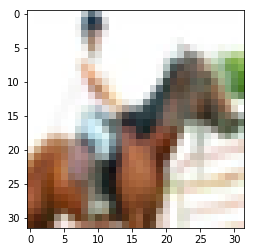

In [119]:
i = 131
img = vec_to_img(train_data.values[i])
# img = img.convert('L')
# print(np.array(img).shape)
img = img.convert('RGB')
print_img(img)
print(train_label[0].values[i])

In [121]:
t = train_data.apply(lambda x:img_to_vec(vec_to_img(x).convert('L')),axis = 1,result_type = 'expand')

In [123]:
t2 = test_data.apply(lambda x:img_to_vec(vec_to_img(x).convert('L')),axis = 1,result_type = 'expand')

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(t.values,train_label[0].values)
lr_predicted = lr.predict(t2.values)
print(calc_grade(lr_predicted))